# SSA: Daily Images

In [1]:
from scipy.sparse import csgraph
from scipy.sparse.linalg import eigs
import matplotlib.pyplot as plt
import netCDF4
import numpy as np
import pandas as pd
import warnings
import scripts.helper as helper
import scripts.matrix_helper as mat_helper
from mpl_toolkits.basemap import Basemap
from scipy import signal

#Cool stuff -> Every notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

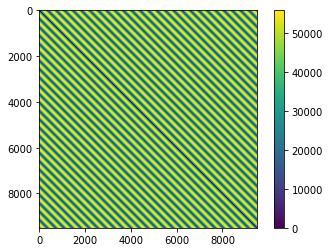

In [2]:
#Load precomputed Distance matrix -- select Daily/Monthly and 1, 5 or 10 years
D = np.load('Daily_D_Mat_5y.npy', mmap_mode='r')
plt.imshow(D)
plt.colorbar()

In [3]:
# Singular value decomposition
u, s, vT = np.linalg.svd(D)

In [4]:
u.shape

(9499, 9499)

In [5]:
s.shape

(9499,)

In [6]:
vT.shape

(9499, 9499)

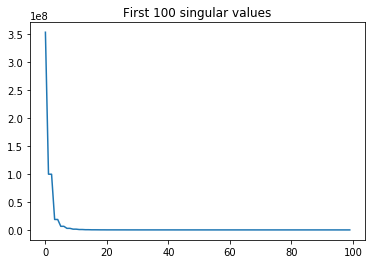

In [7]:
# Singular values plot
plt.title('First 100 singular values')
plt.plot(s[:100])
plt.show()

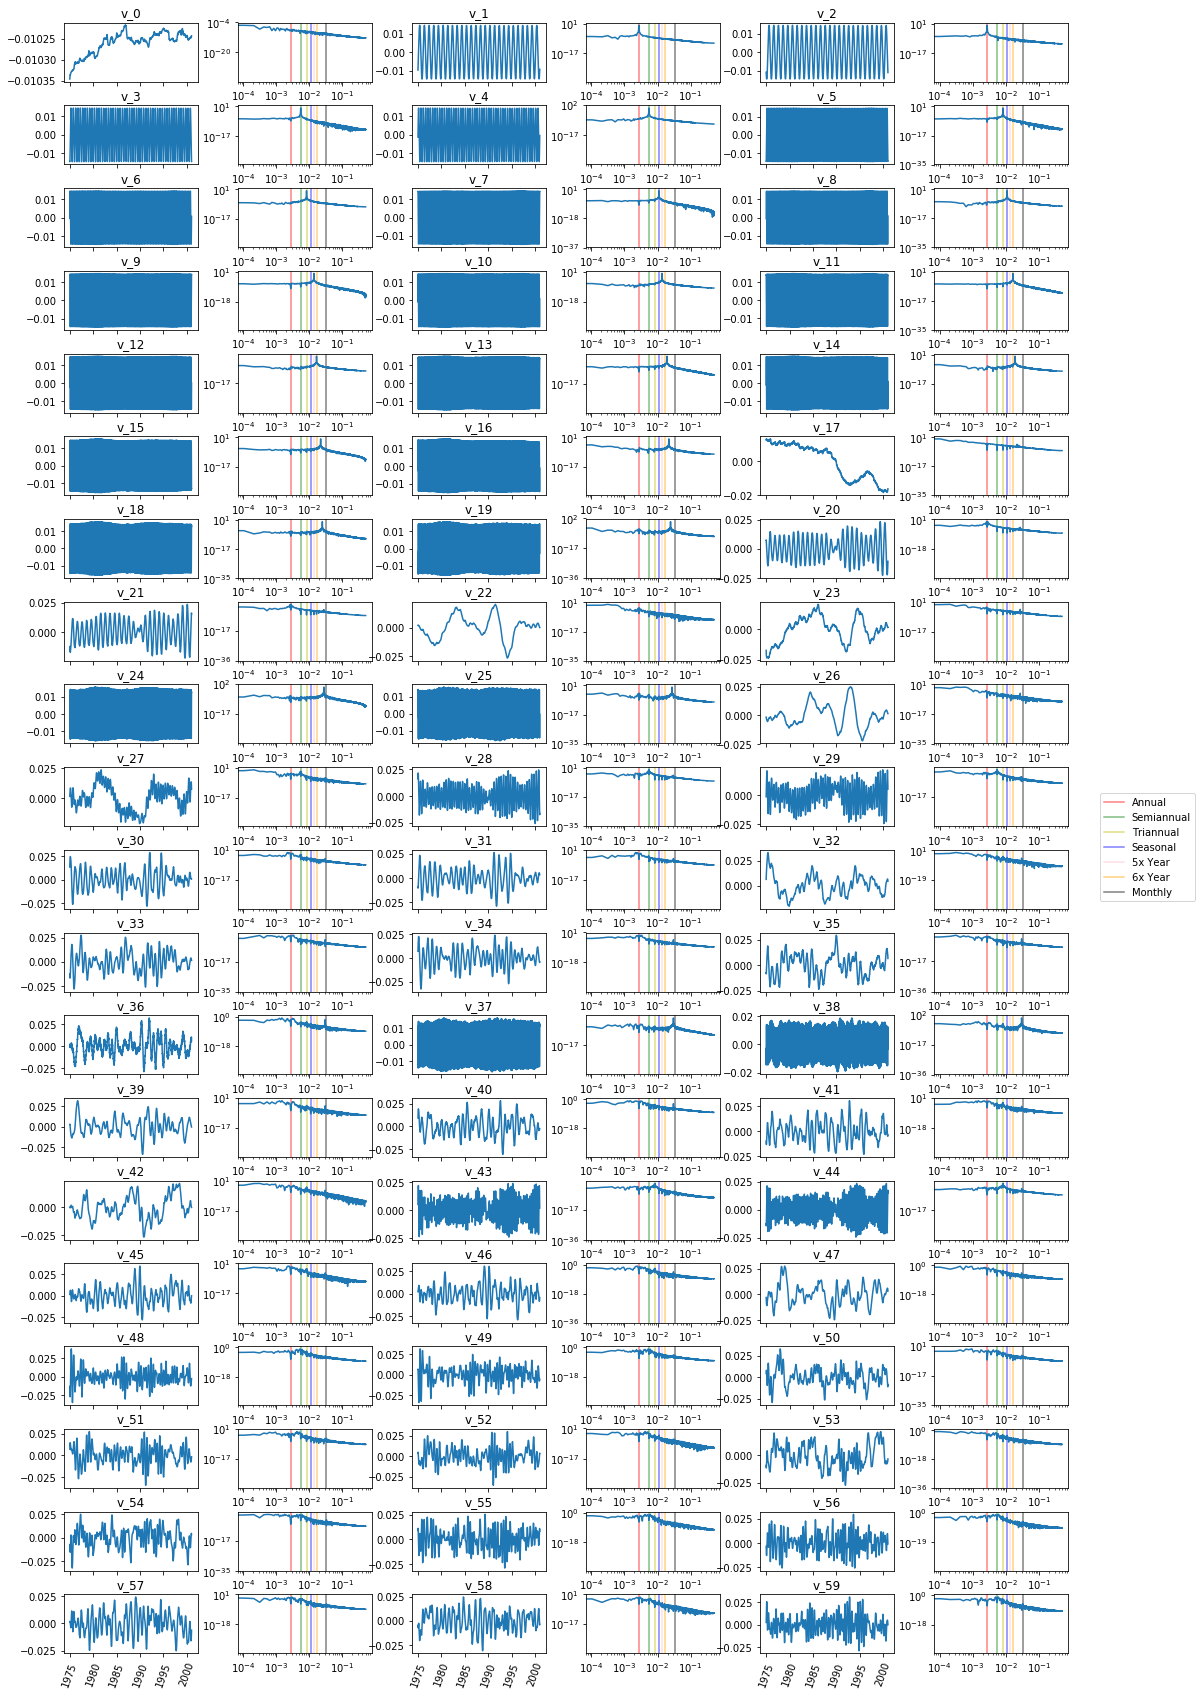

In [14]:
# Frequencies plot
list_vector = [i for i in range(0, 60)]
my_xticks = np.arange(1975, 2001, 5)
fig = plt.figure(figsize=(18,30))
ind = 1
for i in list_vector:
    ax = plt.subplot(20, 6, ind)
    ax.set_xticks(np.arange(0, len(u[:, 0]), 1825))
    
    if i == 57 or i == 58 or i == 59:
        ax.set_xticklabels(my_xticks, rotation='70')
    else:
        ax.set_xticklabels(['', '', '', '', ''], rotation='70')
          
    ind += 1
    plt.title('v_' + str(i))
    plt.plot(u[:, i])
    
    plt.subplot(20, 6, ind)
    ind += 1
    f, Pxx_den = signal.periodogram(np.real(u[:, i]))
    l2 = plt.axvline(x=1/365, color='r', alpha=0.5) #1y
    l3 = plt.axvline(x=1/(365/2), color='g', alpha=0.5) #6m
    l4 = plt.axvline(x=1/(365/3), color='y', alpha=0.5) #4m
    l5 = plt.axvline(x=1/(365/4), color='b', alpha=0.5) #3m
    l6 = plt.axvline(x=1/(365/5), color='pink', alpha=0.5) #2.4m
    l7 = plt.axvline(x=1/(365/6), color='orange', alpha=0.5) #2m
    l8 = plt.axvline(x=1/(365/12), color='black', alpha=0.5)
    plt.loglog(f, Pxx_den)
    
plt.subplots_adjust(hspace=0.4, wspace = 0.3)
fig.legend((l2, l3, l4, l5, l6, l7, l8), ('Annual', 'Semiannual', 'Triannual', 'Seasonal', '5x Year', '6x Year', 'Monthly'), 'center right')
plt.show()

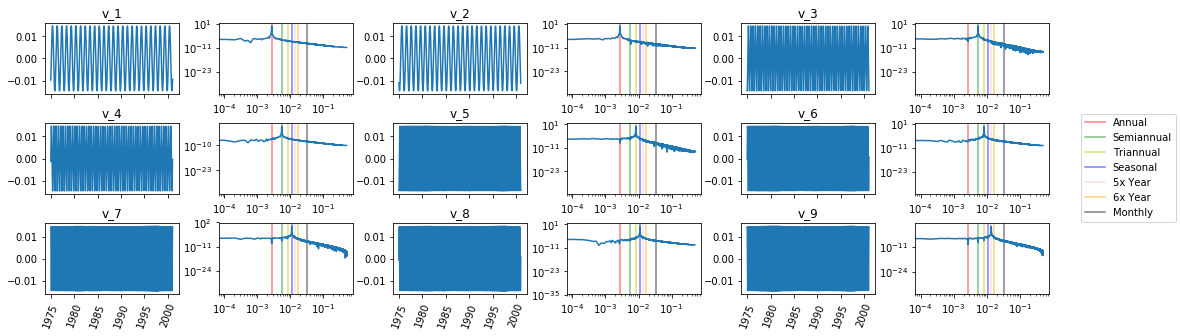

In [15]:
# Frequencies plot
list_vector = [i for i in range(1, 10)]
my_xticks = np.arange(1975, 2001, 5)
fig = plt.figure(figsize=(18,5))
ind = 1
for i in list_vector:
    ax = plt.subplot(3, 6, ind)
    ax.set_xticks(np.arange(0, len(u[:, 0]), 1825))
    
    if i == 7 or i == 8 or i == 9:
        ax.set_xticklabels(my_xticks, rotation='70')
    else:
        ax.set_xticklabels(['', '', '', '', ''], rotation='70')
          
    ind += 1
    plt.title('v_' + str(i))
    plt.plot(u[:, i])
    
    plt.subplot(3, 6, ind)
    ind += 1
    f, Pxx_den = signal.periodogram(np.real(u[:, i]))
    l2 = plt.axvline(x=1/365, color='r', alpha=0.5) #1y
    l3 = plt.axvline(x=1/(365/2), color='g', alpha=0.5) #6m
    l4 = plt.axvline(x=1/(365/3), color='y', alpha=0.5) #4m
    l5 = plt.axvline(x=1/(365/4), color='b', alpha=0.5) #3m
    l6 = plt.axvline(x=1/(365/5), color='pink', alpha=0.5) #2.4m
    l7 = plt.axvline(x=1/(365/6), color='orange', alpha=0.5) #2m
    l8 = plt.axvline(x=1/(365/12), color='black', alpha=0.5)
    plt.loglog(f, Pxx_den)
    
plt.subplots_adjust(hspace=0.4, wspace = 0.3)
fig.legend((l2, l3, l4, l5, l6, l7, l8), ('Annual', 'Semiannual', 'Triannual', 'Seasonal', '5x Year', '6x Year', 'Monthly'), 'center right')
fig.savefig('SSA_1_9.png')

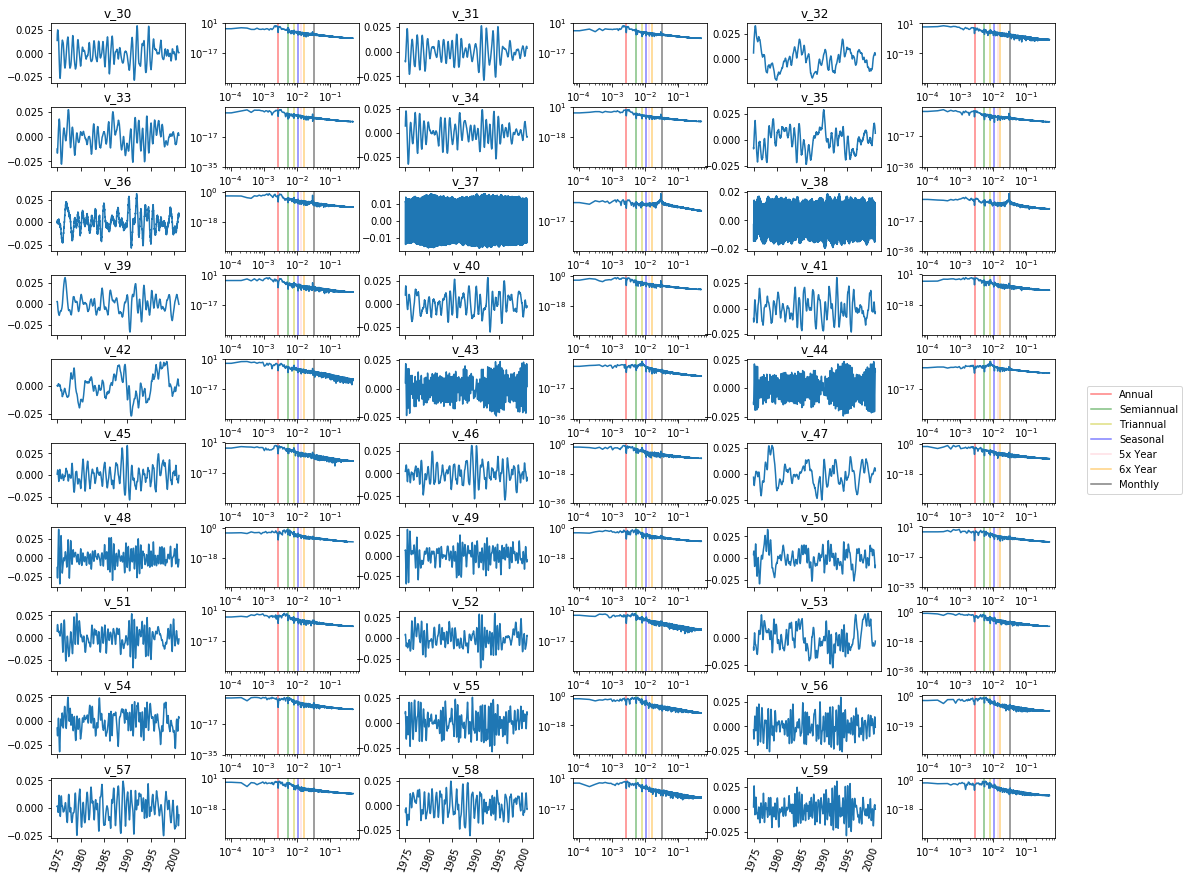

In [16]:
# Frequencies plot
list_vector = [i for i in range(30, 60)]
my_xticks = np.arange(1975, 2001, 5)
fig = plt.figure(figsize=(18,15))
ind = 1
for i in list_vector:
    ax = plt.subplot(10, 6, ind)
    ax.set_xticks(np.arange(0, len(u[:, 0]), 1825))
    
    if i == 57 or i == 58 or i == 59:
        ax.set_xticklabels(my_xticks, rotation='70')
    else:
        ax.set_xticklabels(['', '', '', '', ''], rotation='70')
          
    ind += 1
    plt.title('v_' + str(i))
    plt.plot(u[:, i])
    
    plt.subplot(10, 6, ind)
    ind += 1
    f, Pxx_den = signal.periodogram(np.real(u[:, i]))
    l2 = plt.axvline(x=1/365, color='r', alpha=0.5) #1y
    l3 = plt.axvline(x=1/(365/2), color='g', alpha=0.5) #6m
    l4 = plt.axvline(x=1/(365/3), color='y', alpha=0.5) #4m
    l5 = plt.axvline(x=1/(365/4), color='b', alpha=0.5) #3m
    l6 = plt.axvline(x=1/(365/5), color='pink', alpha=0.5) #2.4m
    l7 = plt.axvline(x=1/(365/6), color='orange', alpha=0.5) #2m
    l8 = plt.axvline(x=1/(365/12), color='black', alpha=0.5)
    plt.loglog(f, Pxx_den)
    
plt.subplots_adjust(hspace=0.4, wspace = 0.3)
fig.legend((l2, l3, l4, l5, l6, l7, l8), ('Annual', 'Semiannual', 'Triannual', 'Seasonal', '5x Year', '6x Year', 'Monthly'), 'center right')
fig.savefig('SSA_30_60.png')

In [8]:
# Load original data for projection
d_data = np.load('Daily_1970_2000_data.npy', mmap_mode='r')

In [33]:
chosen_vec = u[:, 4]
size_vec = len(chosen_vec)
resized_data = d_data[(d_data.shape[0] - size_vec):,:]
resized_data = resized_data.reshape(resized_data.shape[0], resized_data.shape[1]*resized_data.shape[2])
X = resized_data.T
s_pattern = X @ chosen_vec
spp = np.reshape(s_pattern,(-1, 72*144))
vec = np.reshape(np.real(chosen_vec), (-1, size_vec))
Y = spp.T @ vec
Z = Y.T
Z = np.reshape(Z, (size_vec, 72, 144))

In [34]:
Z = Z[:365]
# Interpolation to keep scale -1, 1
frames = np.interp(Z, (Z.min(), Z.max()), (-1, 1))

In [35]:
frames.shape

(365, 72, 144)

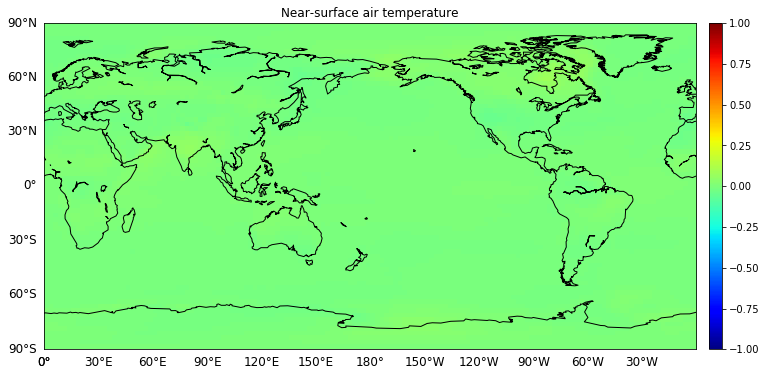

In [36]:
fig = plt.figure(figsize=(16,6))
long = [0, 360]
lat = [-90, 90]


with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    map = Basemap(projection = 'cyl', llcrnrlat = lat[0], llcrnrlon = long[0], urcrnrlat = lat[1], urcrnrlon = long[1])
    map.drawcoastlines()
    map.drawparallels( np.arange(-90,90.01,30.0), labels = [1,0,0,0], fontsize = 12, linewidth = 0)
    map.drawmeridians( np.arange(0.,360.,30.), labels = [0,0,0,1], fontsize = 12, linewidth = 0)
    
    h = map.imshow(frames[0, :], cmap = 'jet', interpolation = 'none', animated = True)
    plt.clim(np.min(frames), np.max(frames))
    map.colorbar(h, size = "2%")#, pad="40%", ticks = range(cmin, cmax + 1, cint))
    plt.title("Near-surface air temperature")

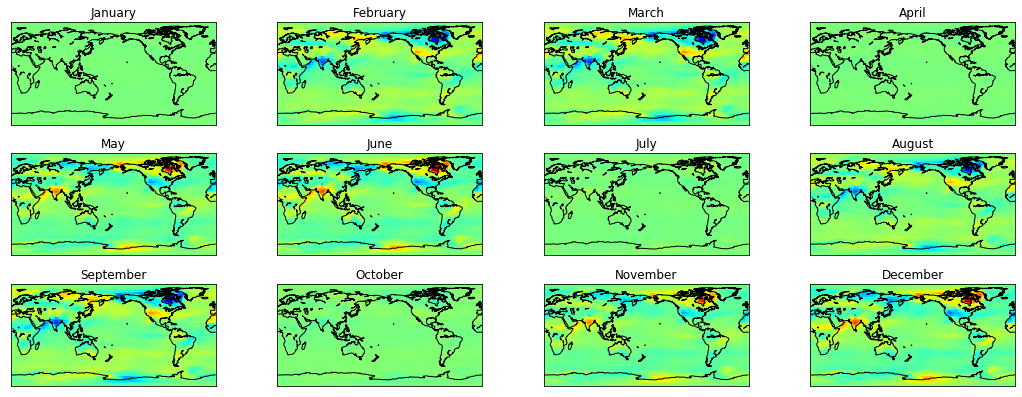

In [37]:
fig = plt.figure(figsize=(18,7))
long = [0, 360]
lat = [-90, 90]

ind = 1
plt.subplot(3, 4, ind)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    map = Basemap(projection = 'cyl', llcrnrlat = lat[0], llcrnrlon = long[0], urcrnrlat = lat[1], urcrnrlon = long[1])
    map.drawcoastlines()
    
    h = map.imshow(Z[1, :], cmap = 'jet', interpolation = 'none', animated = True)
    plt.clim(np.min(Z), np.max(Z))
    plt.title('January')
    
ind += 1
month = 0
titles = ['February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
for i in [31, 61, 91, 121, 151, 181, 211, 241, 271, 301, 331]:
    plt.subplot(3, 4, ind)
    ind += 1
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        map = Basemap(projection = 'cyl', llcrnrlat = lat[0], llcrnrlon = long[0], urcrnrlat = lat[1], urcrnrlon = long[1])
        map.drawcoastlines()

        h2 = map.imshow(Z[i, :], cmap = 'jet', interpolation = 'none', animated = True)
        plt.clim(np.min(Z), np.max(Z))
        plt.title(titles[month])
        month+=1
        
plt.subplots_adjust(hspace=0.1, wspace = 0.3)

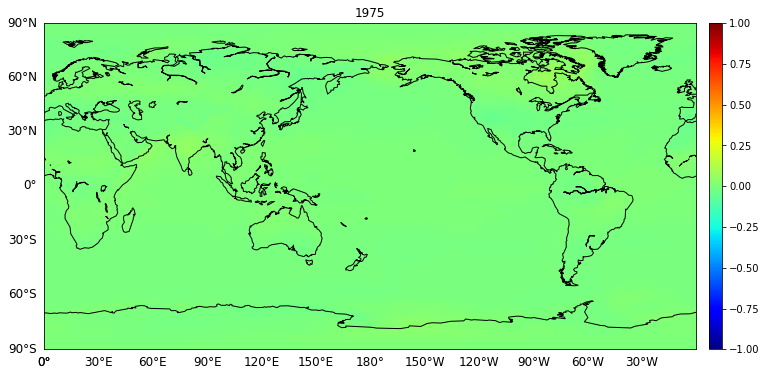

In [38]:
anim = helper.make_animation(frames, 365)

In [39]:
plt.rcParams['animation.ffmpeg_path'] = '/Users/Alexis/anaconda/bin/ffmpeg'

In [40]:
helper.save_as_vid(anim, 'SSA_semi_annual.mp4', 20)